In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("/content/winequality-red.csv")

In [4]:
data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [6]:
data.shape

(1599, 12)

In [7]:
data.dtypes

fixed acidity           float64
volatile acidity        float64
citric acid             float64
residual sugar          float64
chlorides               float64
free sulfur dioxide     float64
total sulfur dioxide    float64
density                 float64
pH                      float64
sulphates               float64
alcohol                 float64
quality                   int64
dtype: object

In [8]:
data.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
pH                      False
sulphates               False
alcohol                 False
quality                 False
dtype: bool

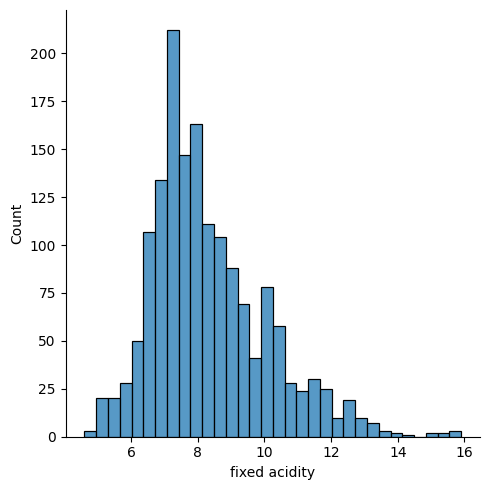

In [9]:
sns.displot(data["fixed acidity"])

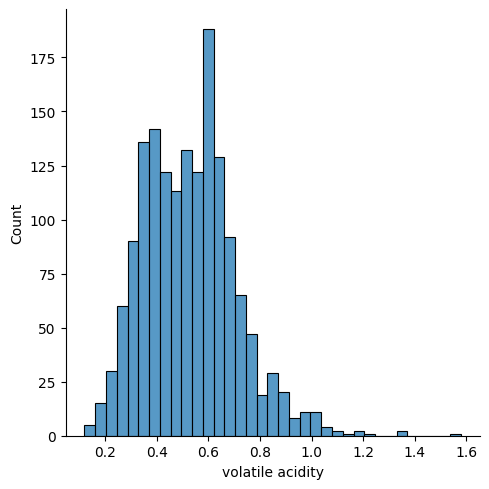

In [10]:
sns.displot(data["volatile acidity"])

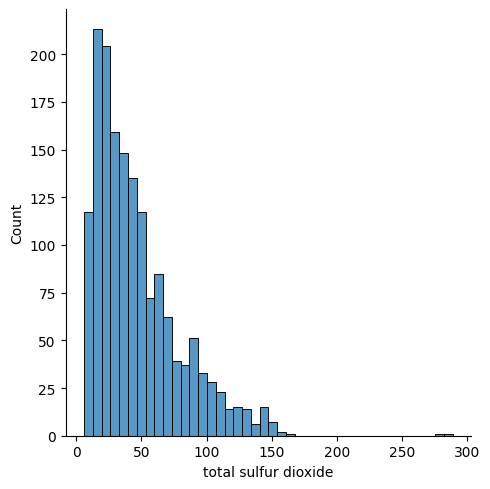

In [12]:
sns.displot(data["total sulfur dioxide"])

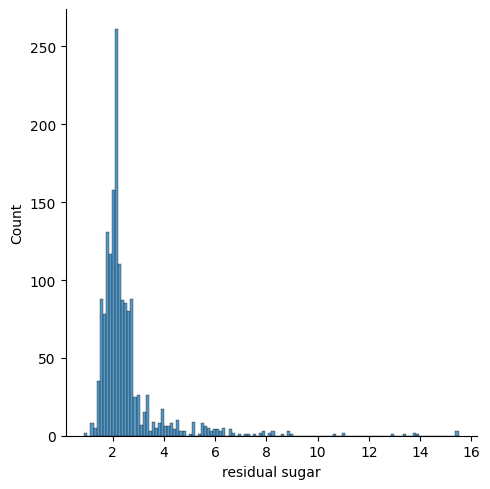

In [13]:
sns.displot(data["residual sugar"])

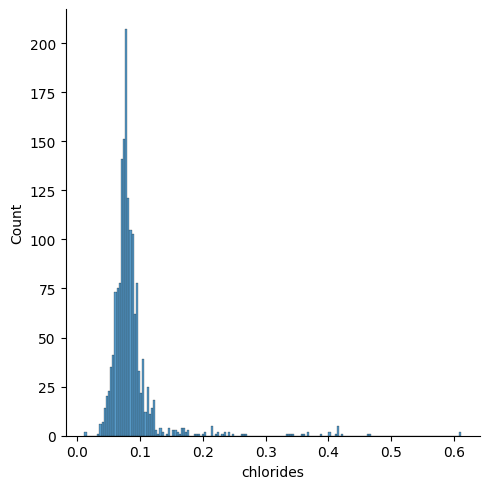

In [14]:
sns.displot(data["chlorides"])

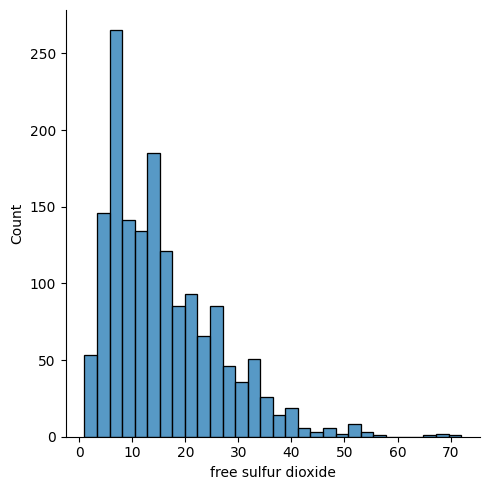

In [15]:
sns.displot(data["free sulfur dioxide"])

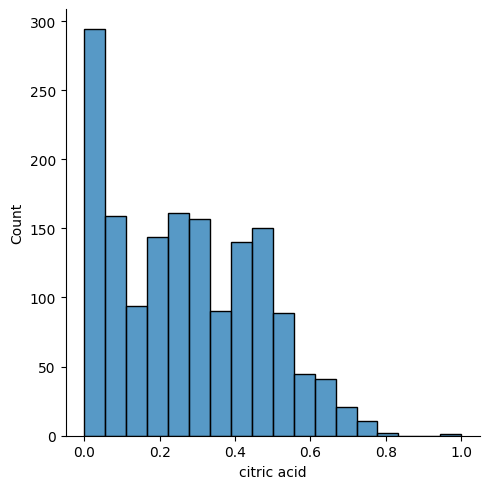

In [16]:
sns.displot(data["citric acid"])

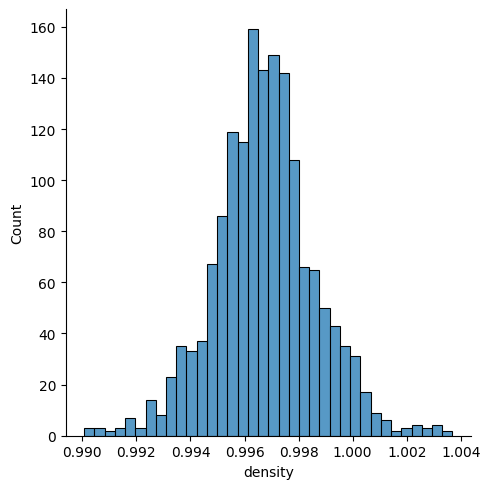

In [17]:
sns.displot(data["density"])

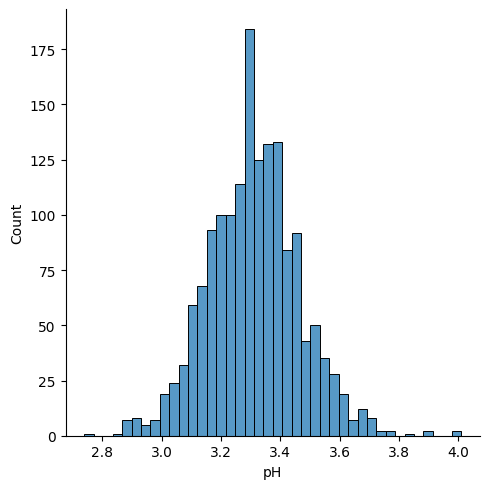

In [18]:
sns.displot(data["pH"])

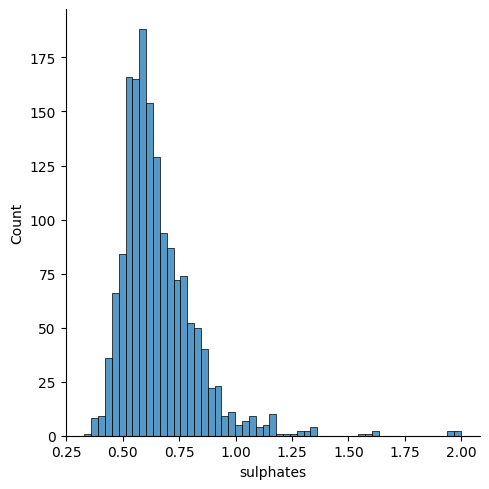

In [19]:
sns.displot(data["sulphates"])

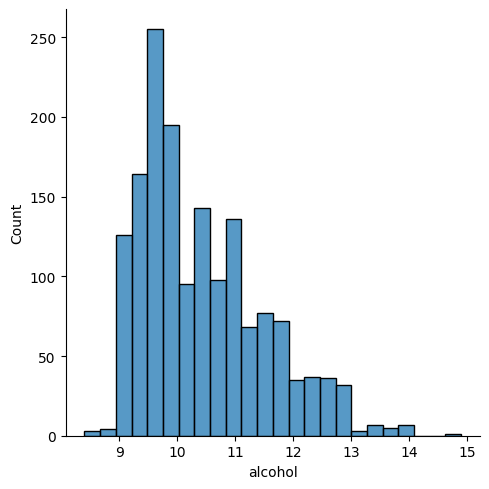

In [20]:
sns.displot(data["alcohol"])

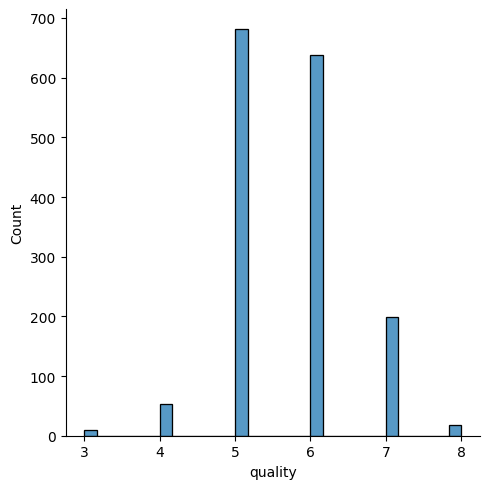

In [21]:
sns.displot(data["quality"])

<Axes: >

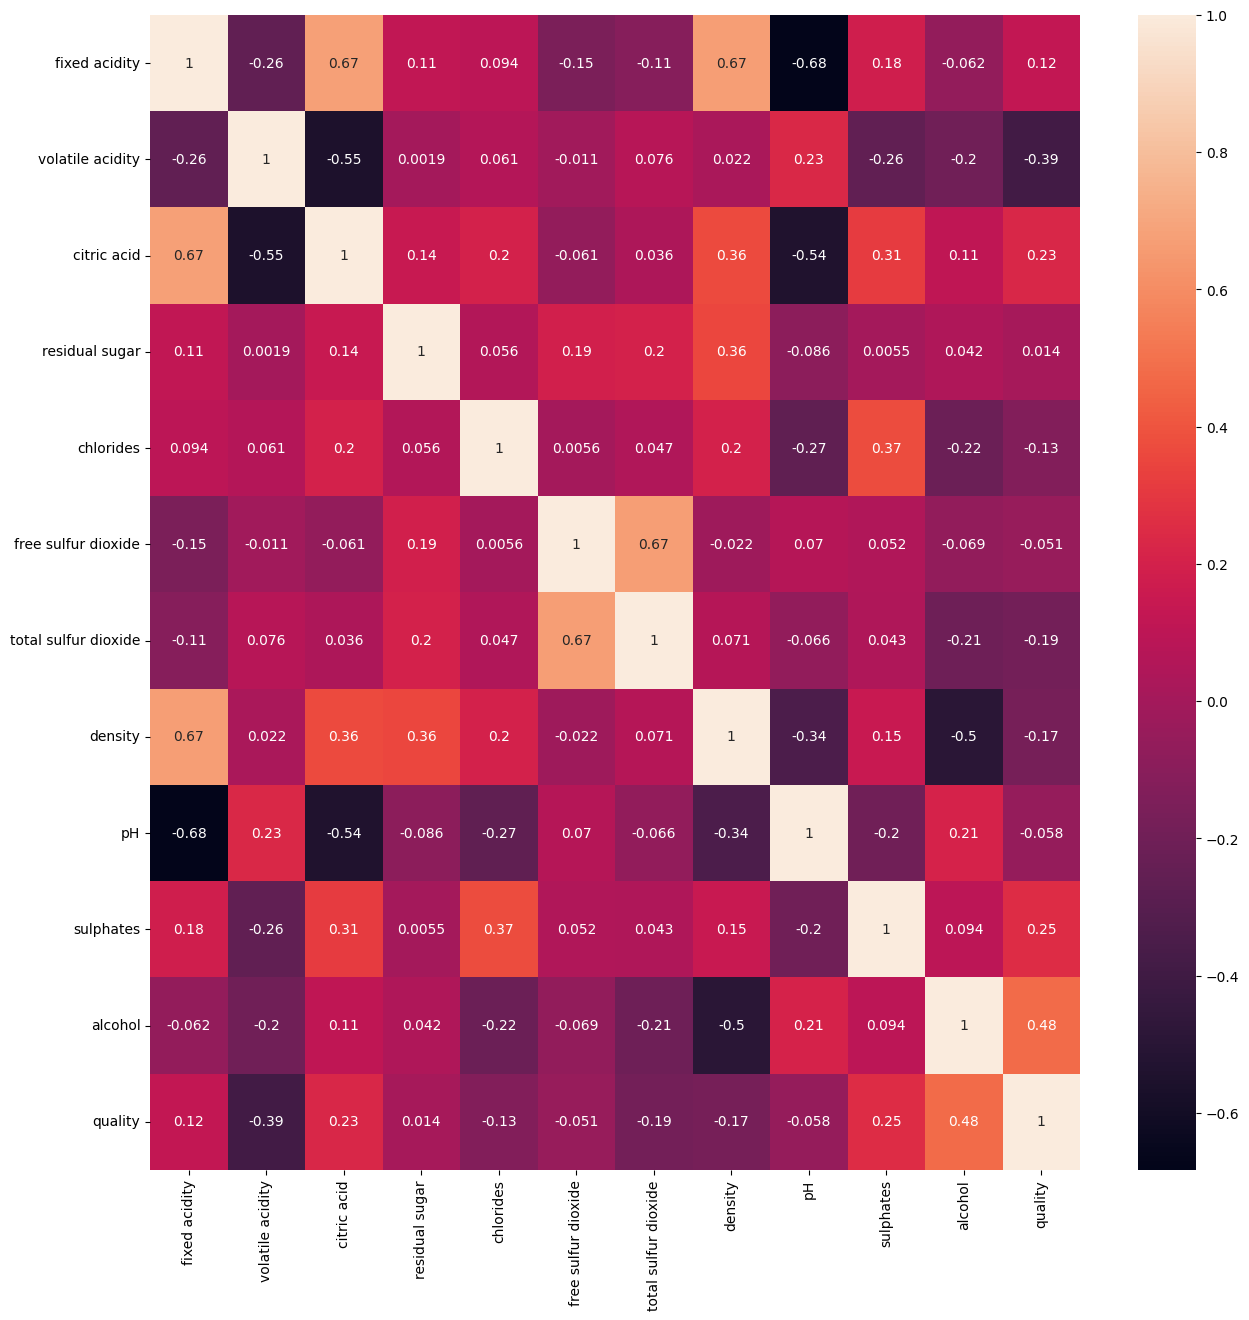

In [22]:
plt.figure(figsize=(15,15))
sns.heatmap(data.corr(),annot=True)

In [23]:
C = data.columns
C.drop('quality')

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [24]:
for i in C:
  q1 = data[i].quantile(0.25) #Q1
  q3 = data[i].quantile(0.75) #Q3
  IQR = q3-q1
  upper_limit = q3+1.5*IQR
  lower_limit = q1-1.5*IQR
  #print(upper_limit,lower_limit)
  data[i] = np.where(data[i]>upper_limit,data[i].median(),data[i])
  data[i] = np.where(data[i]<lower_limit,data[i].median(),data[i])
  rs_02=data[i].quantile(0.02)
  rs_96=data[i].quantile(0.96)
  data=data[(data[i]>=rs_02) & (data[i]<=rs_96)]

<ipython-input-24-26114ddacc6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i]>upper_limit,data[i].median(),data[i])
<ipython-input-24-26114ddacc6e>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[i] = np.where(data[i]<lower_limit,data[i].median(),data[i])
<ipython-input-24-26114ddacc6e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation

In [25]:
y = data['quality']
y

0       5.0
2       5.0
3       6.0
4       5.0
5       5.0
       ... 
1589    5.0
1592    6.0
1593    6.0
1594    5.0
1596    6.0
Name: quality, Length: 907, dtype: float64

In [26]:
X =data.drop(columns =['quality'],axis =1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4


<Axes: >

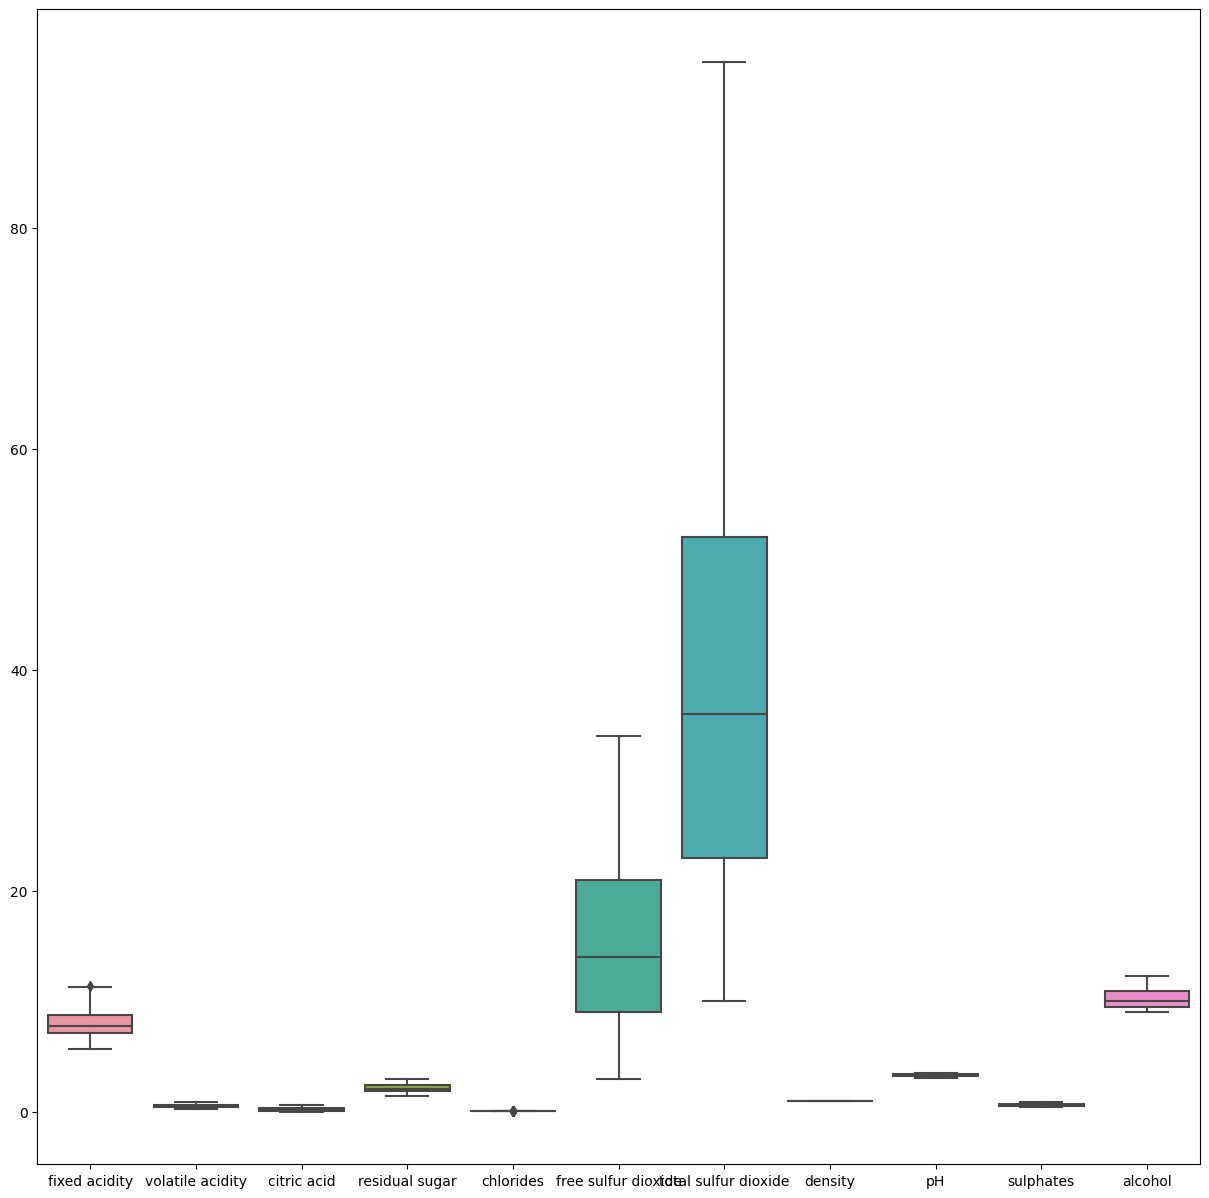

In [27]:
plt.figure(figsize=(15,15))
sns.boxplot(X)

In [28]:
X.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

<Axes: >

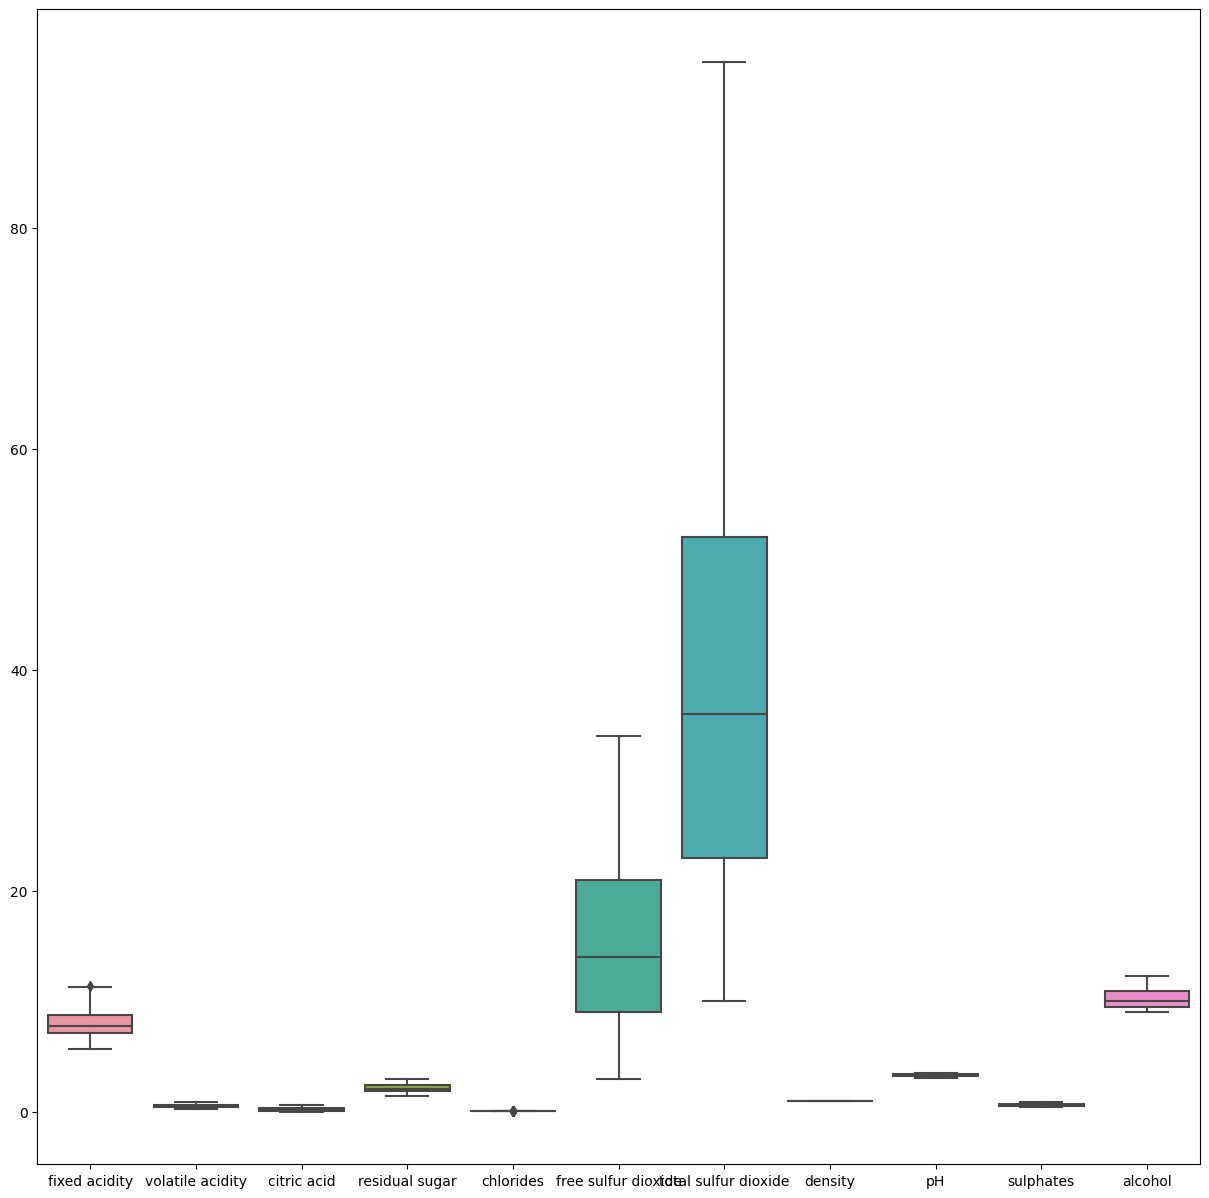

In [29]:
plt.figure(figsize=(15,15))
sns.boxplot(X)

In [30]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [31]:
from sklearn.decomposition import PCA
pca = PCA()
X_pca = pca.fit_transform(X)

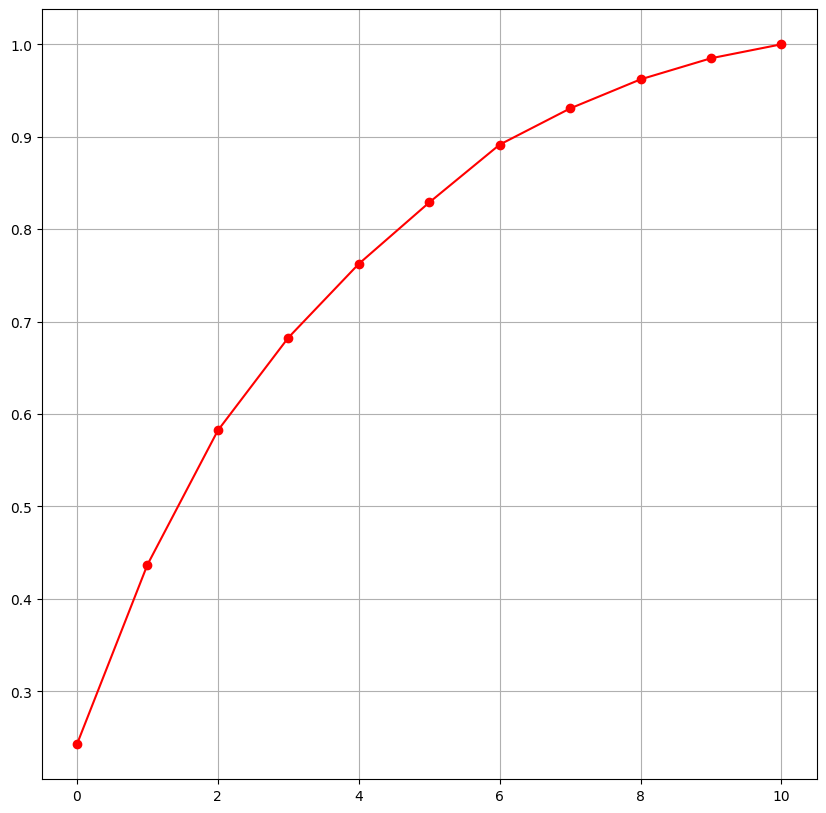

In [32]:
plt.figure(figsize=(10,10))
plt.plot(np.cumsum(pca.explained_variance_ratio_), 'ro-')
plt.grid()

In [33]:
pca_new = PCA(n_components=8)
X_new = pca_new.fit_transform(X)

In [34]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.2,random_state=3)

In [35]:
from sklearn import metrics
from sklearn.metrics import *

In [37]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [38]:
# Standardize the features (optional but recommended)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Create and train the multinomial logistic regression model
model = LogisticRegression(multi_class='multinomial', max_iter=1000)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)

In [39]:
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, y_pred)
dt_acc_score = accuracy_score(y_test, y_pred)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[ 0  5  2  0]
 [ 1 63 22  0]
 [ 0 23 45  2]
 [ 0  1 14  4]]
61.53846153846154


In [40]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)
dt_predict = dt.predict(X_test)
#print confusion matrix and accuracy score
dt_conf_matrix = confusion_matrix(y_test, dt_predict)
dt_acc_score = accuracy_score(y_test, dt_predict)
print(dt_conf_matrix)
print(dt_acc_score*100)

[[ 1  3  3  0]
 [ 2 58 25  1]
 [ 2 17 47  4]
 [ 0  0  7 12]]
64.83516483516483


In [41]:
from sklearn.ensemble import RandomForestClassifier
model2 =RandomForestClassifier(n_estimators=200,criterion='entropy')
model2.fit(X_train,y_train)

RandomForestClassifier(criterion='entropy', n_estimators=200)

In [42]:
r_y_predict = model2.predict(X_test)
r_y_predict_train = model2.predict(X_train)

In [43]:
print('Testing Accuracy = ', accuracy_score(y_test,r_y_predict))
print('Training Accuracy = ', accuracy_score(y_train,r_y_predict_train))

Testing Accuracy =  0.7307692307692307
Training Accuracy =  1.0
